# Binning, Discretization

Text(0.5, 0, 'Input feature')

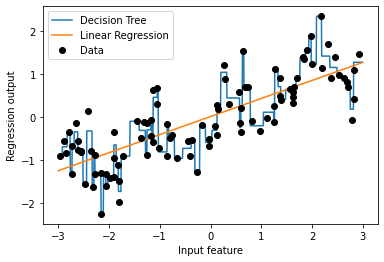

In [6]:
# making linear model more powerful on continuos data
# by binning or discretize the data

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="Linear Regression")

plt.plot(X[:,0], y, 'o', c='k')
plt.legend(["Decision Tree", "Linear Regression", "Data"])
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [7]:
# create bin from range -3 to 3 with 10 bins
bins = np.linspace(-3, 3, 11)
print("Bins {}".format(bins))

Bins [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [8]:
# using digitize function allocate the data to their bins
which_bin = np.digitize(X, bins=bins)
print("Data points \n", X[:5])
print("Which bin \n",which_bin[:5])

Data points 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Which bin 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [10]:
# using one-hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin) # find the unique valuse which appear in bin
X_binned = encoder.transform(which_bin) # transform the bins
print(X_binned[:5])
print("shape ", X_binned.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
shape  (100, 10)


Text(0.5, 0, 'Input feature')

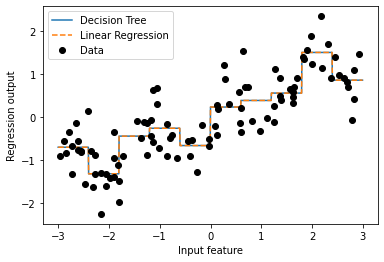

In [14]:
# apply one hot encoder
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Linear regression binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), linestyle='--', label="Decision tree binned")

plt.plot(X[:,0], y, 'o', c='k')
plt.legend(["Decision Tree", "Linear Regression", "Data"])
plt.ylabel("Regression output")
plt.xlabel("Input feature")

the tree and linear model both made the same prediction.
it means that the linear model get the benefit from the binning.
the tree model looking at the features all at once, while binning
usually done per feature basis. if there are some features that have
no linear relationship with the output, binning can help improving the
model.